# Chapter 1. The Machine Learning Landscape

In this chapter, we will:

- Define what is machine learning (ML)?
- Why we should use ML?
- Present a few applications of ML.
- List ML algorithm types.
    - Supervised vs. Unsupervised Learning
    - Online vs. batch learning.
    - Instance-based vs. model-based learning.
- Go over a simple example using Linear Regression.
- Understand how linear regression is implemented and re-implement our own version of it.
- Talk about common challenges when using ML. 

## What is Machine Learning?

ML is the art & science of programming computers to learn from data. 

Arthur Samuel:
> ML is the field of study that gives computers the ability to learn without being explicitly programmed.

A more formal definition:

Tom Mitchell:
> A computer program is said to learn from experience $E$ with respect to some task $T$ and some performance measure $P$, if its performance on $T$, as measured by $P$, improves with experience $E$.

## Why use Machine Learning?

When building rule-based programs, we usually follow these steps:
1. We make manual rules.
2. We implement the rules as an algorithm.
3. If the algorithm performs well, we deploy. If not, we go back to step `1`

However, if the problem is complex, we'll likely endup with a long list of rules or complex models that are hard to maintain and scale to other similar problems. An ML system would be much shorter, easier to maintain, and in many cases, more accurate.

On the other hand, we can simply "train" (optimize) an ML algorithm on a large dataset to construct its own "rules", then inspect the algorithm's `feature importance` coefficient to gain a better understanding of the relation between the data and the problem. This is called **data mining**.

## Examples of Applications

ML has many applications, the following are a few notable ones:
- `Image Classification`: assigning discrete categories to each image. Usually performed using convolutional neural networks (CNNs).
- `Semantic segmentation`: our goal is to classify each pixel in an image, one example of this is brain tumor detection.
- `Natural Language Processing` (NLP): a class of problems (classification, modeling, question answering, etc) that deal with language in the form of text. Typical algorithms for NLP include RNNs, CNNs, and Transformers.
- `Forecasting future revenue`: a regression task that can be tackled using multiple algorithms such as:
    - Linear Regression.
    - Polynomial Regression.
    - Support vector machines (SVMs).
    - Decision trees and Random Forests.
    - Artificial Neural Networks.
- `Speech recognition`: tackled by recognizing the incoming audio signals using RNNs, CNNs or Transformers.
- `Fraud detection`: detecting frauds can be solved using supervised (classification) or unsupervised (anomaly detection) learning.
- `Clustering`: segmenting clients based on their purchases so we can design targeted & more effective marketing campaigns.
- `Dimensionality reduction`: useful for high-dimensional data visualization and cluster analysis. It can be solved using algorithms such as `PCA` or `T-SNE`.
- `Recommender systems`: where we can feed in the sequence of client purchases (for example) to an artificial neural network to predict the next purchase.

## Types of Machine Learning Systems

ML algorithms can be classified according to the amount of supervision they get during training, there are 4 major types of ML algorithms:

### Supervised Learning
With supervised learning, the training set we feed into the algorithm contains the labels for each input example. Most supervised learning tasks fall under two umbrellas: `Classification` and `Regression`. With classification, we are interested in predicting discrete values (example: is the email spam `1` or not spam `1`). On the hand, regression deals with continuous target values (example: predict the price of houses in dollars). 

Some regression-based models are used for classification as well, such as `Logistic Regression` which outputs a probability $\in [0,1]$. Here are a few popular supervised learning algorithms:
- K-nearest Neighbors
- Linear Regression
- Logistic Regression
- Decision Trees and Random Forests
- Artificial Neural Networks
- Naive Bayes

### Self-supervised Learning

In unsupervised learning, the data is unlabeled, the system is trying to learn by finding internal structure within the dataset. Here are some unsupervised learning algorithms
- Clustering
    - K-means
    - DBSCAN
    - Hirerchical Cluster Analysis
- Anomaly Detection
    - one-class SVM
    - Isolation Forest
    - Auto-encoders
- Dimensionality Reduction: where the goal is to compress the data without losing too much information. One way to do it is to merge highly correlated features. Algorithms:
    - Principal Component Analysis (`PCA`)
    - t-distributed stochastic Neighbor Embedding (`T-SNE`)
    - Autoencoders
    - Kernel PCA
    - Local Linear Embedding (LLE)
- Association rule learning algorithms find interesting relations between attributes
    - Apriori
    - Eclat

### Semi-supervised Learning

In semi-supervised learning, we have partially-labeled data. The goal is to to use unlabeled data around the labeled data as helpers to solve the task. Most semi-supervised learning algorithms are a combination of unsupervised and supervised learning algorithms.

### Reinforcement Learning
An agent observes the environment, selects an action, gets a reward, and updates its policy.

We can also categorize ML systems to **batch** or **online** algorithms. The question is is whether the algorithm will learn from an incoming stream of data or not. 

### Batch vs. Online ML Algorithms

In batch learning, the model is incapable of incremental learning, it starts by learning from all of the available data offline, and then gets deployed to produce predictions without feeding it any new data points. Another name of batch learning is Offline Learning.

In online learning, we train the data incrementally by continuously feeding it data instances as they come, either individually or in small groups of instances called *mini-batches*. Each learning step is fast and cheap, so the system can learn as data comes, on the fly. Online learning is great for systems that receive data in a continuous flow. 

One important aspect of online learning is how fast the learning algorithm should adapt to new data points or to changes to the overall data distribution. With a big learning rate, the model tends to forget past data and lean heavily towards new data points. With a small learning rate, the model tends to slightly adapt to new data points but keeps its knowledge on old data points mostly intact.

A big challenge with online learning algorithms is that they can be damaged with bad incoming data points and clients will notice that on the fly To mitigate this, we can closely monitor the system through performance metrics and turn off online learning or revert back to a previous model state. We have to also make sure we clean the data before feeding it to the model by conducting anomaly/outlier detection.

### Instance-based vs. Model-based Learning

One other way to categorize ML algorithms is how they generalize. There are two approaches to generalization: **instance-based** approaches and **model-based** approaches.

With instance-based Learning, we perform similarity-based comparisons, a new data point would be classified based on its similarity to the target group in the training set, this would require a measure of similarity.

In model-based learning we build a model for each class of data points and then use the model to classify a new data point (from the validation/test/production environment).

Let's go through an example of model-based learning using linear regression:

In [4]:
%pdb on
%matplotlib widget
import os
from random import sample
from math import sqrt
from pathlib import Path
from IPython.core.debugger import set_trace
import jupyter_plz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.linear_model import LinearRegression
from ipywidgets import interactive
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from ipywidgets import interact

Automatic pdb calling has been turned ON


Let's set the datastore and get the files of interest:

In [7]:
data_store = Path("./data/00/")
assert data_store.exists()

In [9]:
gdp_file = data_store / "gdp_per_capita.csv"
happiness_file = data_store / "oecd.csv"
assert gdp_file.exists() and happiness_file.exists()

In [10]:
gdp = pd.read_csv(
    gdp_file,
    sep="\t",
    encoding="latin1",
    thousands=",",
    na_values="n/a"
).dropna()
gdp.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


.. and we read the OECD data:

In [11]:
# Read the file
oecd = pd.read_csv(
    happiness_file,
    thousands=","
)

# Select the columns of interest
cols = ["Country", "Indicator", "Measure", "Inequality", "Unit", "PowerCode", "Value"]
oecd = oecd[cols]
oecd.head()

,Country,Indicator,Measure,Inequality,Unit,PowerCode,Value
0,Australia,Labour market insecurity,Value,Total,Percentage,Units,5.4
1,Austria,Labour market insecurity,Value,Total,Percentage,Units,3.5
2,Belgium,Labour market insecurity,Value,Total,Percentage,Units,3.7
3,Canada,Labour market insecurity,Value,Total,Percentage,Units,6.0
4,Czech Republic,Labour market insecurity,Value,Total,Percentage,Units,3.1


We are interested in the `Life satisfaction` indicator and we only want to keep its values per country:

In [12]:
# Select the rows and columns of interest
cols = ["Country", "Value"]
oecd = oecd.loc[oecd["Indicator"] == "Life satisfaction", cols]

# Rename the columns
oecd = oecd.rename(columns={"Value": "satisfaction"})
oecd.head()

,Country,satisfaction
1812,Australia,7.3
1813,Austria,7.1
1814,Belgium,6.9
1815,Canada,7.4
1816,Czech Republic,6.7


In the same fashion, we are going to select the columns of interest and remove outliers from the GDP information:

In [20]:
# Get countries and GDP estimates
gdp = gdp[["Country", "2015"]]
gdp = gdp.rename(columns={"2015": "gdp"})

# Remove GDP outliers
gdp = gdp[gdp["gdp"] <= 60_000]
gdp.head()

,Country,gdp
0,Afghanistan,599.994
1,Albania,3995.383
2,Algeria,4318.135
3,Angola,4100.315
4,Antigua and Barbuda,14414.302


Let's join both dataframes together by `country` to estimate the relationship between GDP and life satisfaction:

In [25]:
df = pd.merge(left=gdp, right=oecd, on="Country")
df.shape

(152, 3)

Since we have multiple estimates per country, let's group by country and average them:

In [27]:
df = df.groupby("Country", as_index=False).mean()
df.head()

,Country,gdp,satisfaction
0,Australia,50961.865,7.350
1,Austria,43724.031,7.225
2,Belgium,40106.632,7.000
3,Brazil,8669.998,6.400
4,Canada,43331.961,7.425


Next, let's extract the GDP and satisfaction numbers and visualize them:

In [39]:
# Get the inputs (GDP) and outputs (Life satisfaction)
X = df["gdp"].values.reshape(-1, 1)
y = df["satisfaction"].values.reshape(-1, 1)
X.shape, y.shape

((37, 1), (37, 1))

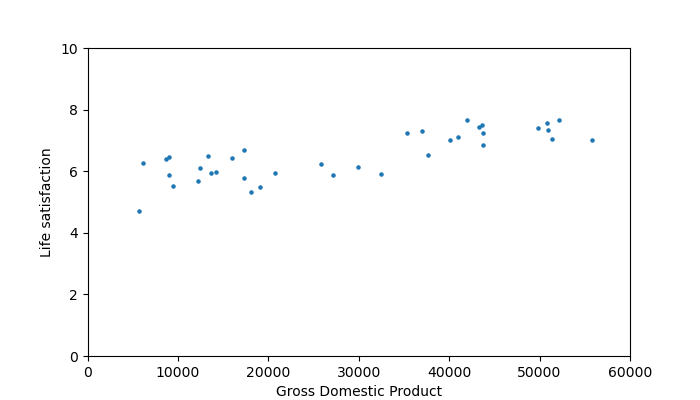

In [40]:
# Visualize
fig, ax = plt.subplots(figsize=(7, 4))
ax.scatter(x=X, y=y, s=5)
ax.set_xlim((0, 60_000))
ax.set_ylim((0, 10))
ax.set_xlabel("Gross Domestic Product")
ax.set_ylabel("Life satisfaction")
plt.show()

Next, we will use an off-the-shelf algorithm to learn the above pattern, specifically good-old `sklearn.linear_model.LienarRegression`: 

In [41]:
# Select the linear model
model = LinearRegression()

# Train the model (estimate the slope and intercept)
model.fit(X, y)

LinearRegression()

What weights did the linear regression model "learn":

In [42]:
model.coef_[0][0], model.intercept_[0]

(3.7628154906868684e-05, 5.441183567496472)

Let's visualize model predictions: 

In [44]:
# Note: because we are using a simple `f(x)=ax+b` model, we can just predict two points to infer all others
X_val = [[7_000], [55_000]]
y_val_hat = model.predict(X_val)

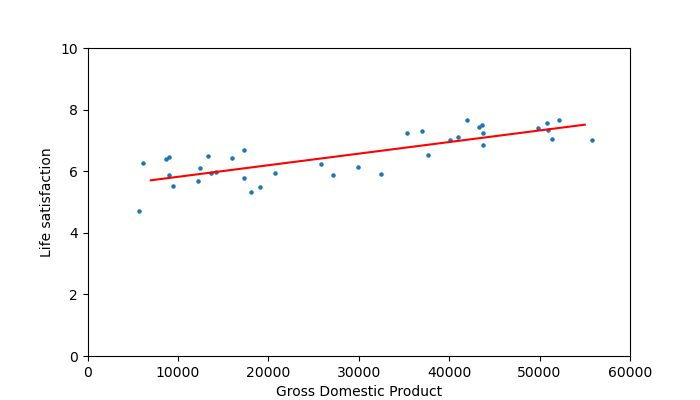

In [45]:
# Visualize
fig, ax = plt.subplots(figsize=(7, 4))
ax.scatter(x=X, y=y, s=5)
ax.plot(X_val, y_val_hat, color="red")
ax.set_xlim((0, 60_000))
ax.set_ylim((0, 10))
ax.set_xlabel("Gross Domestic Product")
ax.set_ylabel("Life satisfaction")
plt.show()

The model seems to be doing fine.

Next, we want to understand how it managed to fit the points so we can reproduce the data-driven algorithm.

- We denote the inputs as $X$.
- We denote the outputs as $y$.
- We want to figure out the weights $w$ such that:

$$y = Xw$$

Given a matrix $\mathbf{X} \in \mathbb{R}^{M \times N}$ and a target vector $\mathbf{y} \in \mathbb{R}^{M}$, find a coefficient vector $\mathbf{w} \in \mathbb{R}^{N}$ that minimizes the squared error between the predicted values $\hat{\mathbf{y}} = \mathbf{X} \mathbf{w}$ and the actual values $\mathbf{y}$:

$$\min_{\mathbf{w} \in \mathbb{R}^{N}} | \mathbf{y} - \mathbf{X} \mathbf{w} |_{2}^{2}$$

where $|\cdot|_{2}$ denotes the L2 norm (i.e., Euclidean norm) of a vector.

 To derive the solution to the least-squares optimization problem, we can take the derivative of the objective function with respect to $\mathbf{w}$, set it equal to zero, and solve for $\mathbf{w}$. Here's how the derivation goes:

\begin{align*}
| \mathbf{y} - \mathbf{X} \mathbf{w} |_{2}^{2} &= (\mathbf{y} - \mathbf{X} \mathbf{w})^T (\mathbf{y} - \mathbf{X} \mathbf{w}) \
&= \mathbf{y}^T \mathbf{y} - 2 \mathbf{w}^T \mathbf{X}^T \mathbf{y} + \mathbf{w}^T \mathbf{X}^T \mathbf{X} \mathbf{w} \
\end{align*}

Taking the derivative of this expression with respect to $\mathbf{w}$ and setting it equal to zero gives:

\begin{align*}
\frac{\partial}{\partial \mathbf{w}} | \mathbf{y} - \mathbf{X} \mathbf{w} |_{2}^{2} &= -2 \mathbf{X}^T \mathbf{y} + 2 \mathbf{X}^T \mathbf{X} \mathbf{w} = \mathbf{0} \
\Rightarrow \quad \mathbf{X}^T \mathbf{X} \mathbf{w} &= \mathbf{X}^T \mathbf{y}
\end{align*}

Assuming that $\mathbf{X}^T \mathbf{X}$ is invertible (i.e., has full rank), we can solve for $\mathbf{w}$:

\begin{align*}
\mathbf{X}^T \mathbf{X} \mathbf{w} &= \mathbf{X}^T \mathbf{y} \
\Rightarrow \quad \mathbf{w} &= (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
\end{align*}

This expression gives us the optimal coefficient vector $\mathbf{w}$ that minimizes the squared error between the predicted values $\hat{\mathbf{y}} = \mathbf{X} \mathbf{w}$ and the actual values $\mathbf{y}$.

### General Tips for High-dimensional Derivations

1. **Understand the dimensions**: Make sure you understand the dimensions of the vectors and matrices involved in the problem. For example, if you're taking the derivative of a vector with respect to a matrix, the resulting expression will be a matrix with the same dimensions as the original matrix.

2. **Use the chain rule**: When taking the derivative of a function involving matrices or vectors, use the chain rule to break it down into simpler parts. For example, if you have a function of the form $f(\mathbf{X}\mathbf{w})$, where $\mathbf{X}$ is a matrix and $\mathbf{w}$ is a vector, you can use the chain rule to write:

$$\frac{\partial}{\partial \mathbf{w}} f(\mathbf{X}\mathbf{w}) = \frac{\partial f}{\partial (\mathbf{X}\mathbf{w})} \frac{\partial (\mathbf{X}\mathbf{w})}{\partial \mathbf{w}} = \mathbf{X}^T \frac{\partial f}{\partial (\mathbf{X}\mathbf{w})}$$

Here, we've used the fact that $\frac{\partial (\mathbf{X}\mathbf{w})}{\partial \mathbf{w}} = \mathbf{X}^T$.

3. **Use the transpose**: When taking the derivative of a function involving matrices or vectors, it's often helpful to use the transpose to simplify the expression.

4. **Use index notation**: In high-dimensional linear algebra, it can be helpful to use index notation to keep track of the indices of the vectors and matrices involved. For example, you can write:

$$\frac{\partial}{\partial w_i} \sum_{j=1}^n X_{ij} w_j = X_{ii}$$

Here, we've used the fact that the derivative of a sum is equal to the sum of the derivatives, and the derivative of $w_j$ with respect to $w_i$ is $\delta_{ij}$ (the Kronecker delta).

Let's implement the above from scratch using our own learner class. The steps:

1. `Fit`: Center `X` and `y` and save `X_mu` and `y_mu`.
2. `Fit`: Add the first column of `1`s to solve for the bias too.
2. `Fit`: Calculate the solution directly: $w=(X^{T}X)^{-1}X^{T}y$ and save it.
3. `Predict`: Shift the input.
4. `Predict`: Add the `1`s.
5. `Predict`: Calculate the predictions like: `y=Xw` and return them.

In [48]:
class CustomLinearRegression:
    
    def __init__(self):
        self.X_mu = None
        self.y_mu = None
        self.w = None
    
    def shift(self, X, y=None):
        if not isinstance(self.X_mu, np.ndarray): self.X_mu = np.mean(X, axis=0)
        if isinstance(y, np.ndarray): 
            self.y_mu = self.y_mu if isinstance(self.y_mu, np.ndarray) else np.mean(y, axis=0)
            y = y - self.y_mu
        X = X - self.X_mu
        return X, y
    
    def add_bias_feature(self, arr):
        ones = np.ones((arr.shape[0], 1))
        return np.concatenate([arr, ones], axis=1)
    
    def fit(self, X, y):
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray)
        X, y = self.shift(X, y)
        X = self.add_bias_feature(X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        assert isinstance(self.w, np.ndarray)
        X, _ = self.shift(X)
        X = self.add_bias_feature(X)
        return (X @ self.w) + self.y_mu
    
    @property
    def slope(self):
        assert isinstance(self.w, np.ndarray)
        return self.w[:-1]

    @property
    def bias(self): 
        assert isinstance(self.w, np.ndarray)
        return self.predict(np.zeros(len(self.w.shape) - 1)[None,...])[0][0]

Let's test the function on the data we have:

In [49]:
# Init our custom model
our_model = CustomLinearRegression()

# Fit it to the data
our_model.fit(X, y)

# Predict the missing points 
y_val_custom_hat = our_model.predict(X_val)

Let's compare our predictions to the original ones:

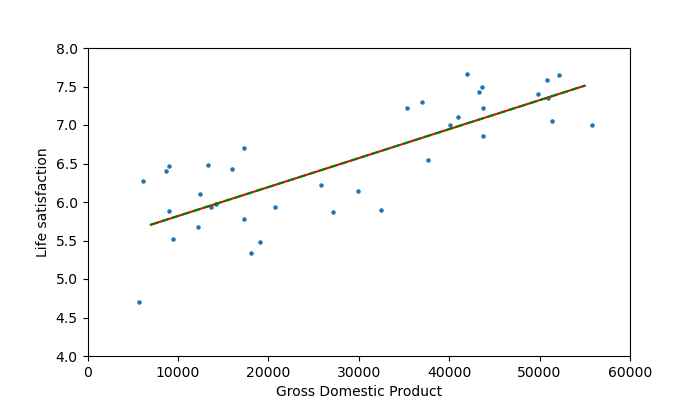

In [50]:
# Visualize
fig, ax = plt.subplots(figsize=(7, 4))
ax.scatter(x=X, y=y, s=5)
ax.plot(X_val, y_val_hat, color="red")
ax.plot(X_val, y_val_custom_hat, color="green", linestyle="--")
ax.set_xlim((0, 60_000))
ax.set_ylim((4, 8))
ax.set_xlabel("Gross Domestic Product")
ax.set_ylabel("Life satisfaction")
plt.show()

Let's compare the derived coefficients:

In [51]:
print(f"sklearn model: Slope {round(model.coef_[0][0], 5)}. Bias {round(model.intercept_[0], 2)}")
print(f"Our model:     Slope {round(our_model.w[0][0], 5)}. Bias {round(our_model.bias, 2)}")

sklearn model: Slope 4e-05. Bias 5.44
Our model:     Slope 4e-05. Bias 5.44


We were able to mirror the learnt parameters from `sklearn.linear_model.LinearRegression`. Of course the `sklearn` module has other features such as `pre-process normalization`, other `solver` types that are more robust, and so on.

However, the core lesson here is that the learning process involves the following components:

- Data: `X` (inputs) and `y` (outputs).
- Model (`predictor`): for simple linear regression it is: `f(X) = w0 + X1w1 + ... + Xnwn`.
- Loss function: least sqaures $\mathcal{L}(y, X, w) = |y - Xw|_2^2$

Our goal is to find a set of weights that minimize the loss function and give us the best predictions possible.

For linear regression, the solution can be analytically derived to be unique because the loss function is convex:

To prove that the least squares function is convex, we need to show that its Hessian matrix is positive semi-definite for all points in its domain.

The least squares function can be written as:

$$f(\boldsymbol{w}) = \frac{1}{2}||\boldsymbol{y} - \boldsymbol{Xw}||_2^2$$

where $\boldsymbol{X} \in \mathbb{R}^{n \times m}$ is the design matrix, $\boldsymbol{w} \in \mathbb{R}^m$ is the weight vector, and $\boldsymbol{y} \in \mathbb{R}^n$ is the target vector.

The Hessian matrix of $f(\boldsymbol{w})$ is:

$$\nabla^2 f(\boldsymbol{w}) = \nabla(\nabla f(\boldsymbol{w})) = \nabla(\boldsymbol{X}^T \boldsymbol{X}) = \boldsymbol{X}^T \boldsymbol{X}$$

To show that $\boldsymbol{X}^T \boldsymbol{X}$ is positive semi-definite, we need to show that for any vector $\boldsymbol{v} \in \mathbb{R}^m$, $\boldsymbol{v}^T \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{v} \geq 0$.

We can rewrite $\boldsymbol{v}^T \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{v}$ as $(\boldsymbol{X} \boldsymbol{v})^T (\boldsymbol{X} \boldsymbol{v})$, which is the dot product of $\boldsymbol{X} \boldsymbol{v}$ with itself. Since the dot product of any vector with itself is always non-negative, we have:

$$(\boldsymbol{X} \boldsymbol{v})^T (\boldsymbol{X} \boldsymbol{v}) \geq 0$$

Therefore, $\boldsymbol{X}^T \boldsymbol{X}$ is positive semi-definite, and the least squares function is convex.

However, the majority of modern ML optimizers are stochastic because of the non-convexity of loss functions. For this reason, we will explore algorithms for finding the best weights using stochastic methods, with a focus on gradient-based methods.

To do this, let's start by plotting our points with the ability to change the parameters of the model manually: 

In [52]:
# Manually create the model
def plot_line(a, b):
    
    # Create the edges to be predicted
    X_val = [7_000, 55_000]
    y_val_hat = [X_val[0]*a + b, X_val[1]*a + b]
    
    # Plot
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.scatter(x=X, y=y, s=5)
    ax.plot(X_val, y_val_hat, color="red")
    ax.set_xlim((0, 60_000))
    ax.set_ylim((0, 10))
    ax.set_xlabel("Gross Domestic Product")
    ax.set_ylabel("Life satisfaction")
    plt.show()
    
# Use the interactive widget to create a slider that controls the frequency
interactive_plot = interactive(plot_line, a=(3e-05,5e-05, 1e-06), b=(0,10,.1))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(FloatSlider(value=3.9999999999999996e-05, description='a', max=5e-05, min=3e-05, step=1e…

We can use our intuition to select the best model. However, we can do better by adding the loss function estimate into the title of the figure to guide us:

In [53]:
def least_squares_loss(y, y_hat):
    return float(np.sum((y - y_hat)**2))

# Manually create the model
def plot_line(a, b):
    
    # Calculate the loss using `a` and `b`
    y_hat = X*a + b
    loss = least_squares_loss(y, y_hat)
    
    # Create the edges to be predicted
    X_val = [7_000, 55_000]
    y_val_hat = [X_val[0]*a + b, X_val[1]*a + b]
    
    # Plot
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.scatter(x=X, y=y, s=5)
    ax.plot(X_val, y_val_hat, color="red")
    ax.set_xlim((0, 60_000))
    ax.set_ylim((0, 10))
    ax.set_xlabel("Gross Domestic Product")
    ax.set_ylabel("Life satisfaction")
    ax.set_title(f"Loss: {round(loss, 4)}")
    plt.show()
    
# Use the interactive widget to create a slider that controls the frequency
interactive_plot = interactive(plot_line, a=(3e-05,5e-05, 1e-06), b=(0,10,.05))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(FloatSlider(value=3.9999999999999996e-05, description='a', max=5e-05, min=3e-05, step=1e…

We notice that we always optimize for one parameter before optimizing w.r.t the other.

To do better, let's plot the function everywhere for (`a` and `b`) and reach the mininmum manually:

In [54]:
def predict(a, b, X): return (X * a) + b

# Precompute: Estimate 2D loss
a_values = np.linspace(3e-05, 5e-05, 100)
b_values = np.linspace(0, 10, 500)
A, B = np.meshgrid(a_values, b_values)
L = np.zeros_like(A)
for i in range(len(a_values)):
    for j in range(len(b_values)):
        a_ = a_values[i]
        b_ = b_values[j]
        y_hat_ = predict(a_, b_, X)
        L[j,i] = least_squares_loss(y, y_hat_)

# Manually create the model
def plot_line(a, b):
    
    # Create the edges to be predicted
    X_val = np.array([7_000, 55_000])
    y_val_hat = predict(a, b, X_val)
    
    # Calculate the loss using `a` and `b`
    y_hat_ = predict(a, b, X)
    loss = least_squares_loss(y, y_hat_)
    
    # Init the axes
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 1*5))
    
    # Plot the first figure 
    ax1.scatter(x=X, y=y, s=5)
    ax1.plot(X_val, y_val_hat, color="red")
    ax1.set_xlim((0, 60_000))
    ax1.set_ylim((0, 10))
    ax1.set_xlabel("Gross Domestic Product")
    ax1.set_ylabel("Life satisfaction")
    ax1.set_title(f"Loss: {round(loss, 4)}")
    
    # Plot the 3D plot on the second subplot
    ax2 = fig.add_subplot(122, projection="3d")
    ax2.plot_surface(A, B, L, cmap='coolwarm', alpha=.5)
    ax2.scatter(a, b, loss, s=50, c='r', marker='o')
    ax2.set_xlabel('a')
    ax2.set_ylabel('b')
    ax2.set_zlabel('Loss')
    ax2.set_title('3D Plot')
    ax2.set_box_aspect([1, 1, 0.5])
    
    # Show
    plt.show()
    
# Use the interactive widget to create a slider that controls the frequency
interactive_plot = interactive(plot_line, a=(3e-05, 5e-05, 1e-07), b=(0, 10, 0.1))
output = interactive_plot.children[-1]
output.layout.height = "650px"
interactive_plot

interactive(children=(FloatSlider(value=3.9999999999999996e-05, description='a', max=5e-05, min=3e-05, step=1e…

Let's experiment with other optimization algorithms:

- [x] `Random search`: 
    1. Start with initial weights (`a0`, `b0`) and radius eps
    2. Uniformely sample `batch_size` weight points from the domain of which the initial point is the center.
    3. Calculate the loss for each point. 
    4. Get the point where the loss is at a minimum.
    5. Go to step `1` where the center is the initial point and `eps <- eps / 2`.
    6. Stop when `abs(old_loss - new_loss) < alpha` (where alpha is pre-determined.  
- [x] `Batch Gradient descent`:
    0. Fix the learning rate and calculate the derivative of the loss function with respect to `a` and `b`.
    1. Start with randomly assigned initial weights.
    2. Conduct `W <- W - deriv(J)/(W)` for each parameter.
    3. Stop when `abs(new_loss - old_loss) < alpha`.
- [x] `Stochastic Gradient Descent`: updates the model based on the gradient of the loss function with respect to the parameters. It uses a small batch of training examples to estimate the gradient.
- [x] `Momentum`: adds a momentum term to the gradient updates to smooth out the updates and accelerate convergence. The momentum term accumulates the gradients of past updates and uses them to make larger updates in consistent directions.
- [ ] `AdaGrad`: adapts the `lr` for each parameter by dividing the `lr` by a running sum of the squared gradients for each parameter, which reduces the learning rate for frequently updated parameters and increases it for infrequently updated ones.
- [ ] `RMSProp`: This optimization algorithm is similar to `AdaGrad`, but it uses a moving average of the squared gradients to adapt the learning rate for each parameter.
- [ ] `Adam`: combines the ideas of momentum and adaptive `lr`. It uses a moving average of the gradients and a moving average of the squared gradients to adapt the learning rate for each parameter. 
    - It also includes bias correction terms to account for the initial estimates of the moving averages being biased towards zero.

Let's start by implementing `random search`, we implement the following components:

- [x] `predict(a,b,w)`.
- [x] `loss(y, y_hat)`.
- [x] `sample(start, end, size)`
- [x] `reduce(eps)`
- [x] `plot_state(a, b)`.

In [55]:
def get_data(normalize=False): 
    X = df["gdp"].values.reshape(-1, 1)
    y = df["satisfaction"].values.reshape(-1, 1)
    if normalize:  
        X = (X - X.mean(axis=0, keepdims=True)) / X.std(axis=0, keepdims=True)
        y = (y - y.mean()) / y.std()
    return X, y
def predict(X,a,b): return (a*X) + b
def loss(y, y_hat): return float(np.sum((y - y_hat) ** 2))
def sample_points(center, eps, size=10):
    a0, a1 = center[0] - eps[0], center[0] + eps[0]
    b0, b1 = center[1] - eps[1], center[1] + eps[1]
    a_values = np.random.uniform(a0, a1, size=size)
    b_values = np.random.uniform(b0, b1, size=size)
    A, B = np.meshgrid(a_values, b_values)
    A = A.reshape(-1, 1)
    B = B.reshape(-1, 1)
    return np.concatenate((A, B), axis=1)
def reduce(eps, factor=.9): return [float(e*factor) for e in eps]

Let's write the algorithm:

In [56]:
# Start somewhere
p = [0, 5]
eps = [1e-2, 5]
prev_loss = float("+inf")
ins, outs = get_data()
alpha = 1e-4
eps_reducer = 0.9
history = list()

# Search until you can't improve anymore
# .. and maybe plot :)
while True:
    
    # Sample the weights
    weights = sample_points(p, eps, size=100).tolist()
    
    # Init the list of local lorandoms
    losses = list()
    for a, b in weights: losses.append((a, b, loss(outs, predict(ins,a,b))))
    
    # Get the weights at the minimum loss
    best_a, best_b, new_loss = sorted(losses, key=lambda e: e[-1])[0]
    p = [best_a, best_b]
    print(f"The current best parameters: {p} with loss: {round(new_loss, 3)}")
    
    # Stop if we are not improving much
    if abs(prev_loss - new_loss) < alpha: break
        
    # Otherwise, reduce the search space
    prev_loss = new_loss
    eps = reduce(eps)
    
    # Store training history
    history.append((best_a, best_b, new_loss))

The current best parameters: [2.616524479125658e-05, 5.668886874235399] with loss: 8.949
The current best parameters: [8.934566587386582e-05, 4.065900101463828] with loss: 32.565
The current best parameters: [1.4936336970172367e-05, 6.066824318343755] with loss: 12.16
The current best parameters: [6.87685882669823e-05, 4.577225720773907] with loss: 16.386
The current best parameters: [9.965559330485981e-05, 3.691648677628524] with loss: 43.087
The current best parameters: [5.540350390827089e-05, 4.920745517027552] with loss: 10.302
The current best parameters: [0.00017438936273526332, 2.3746284926689225] with loss: 206.907
The current best parameters: [-0.00011441291209895576, 4.6938416024916165] with loss: 1179.632
The current best parameters: [2.1529254190528167e-05, 5.7688071342697125] with loss: 10.412
The current best parameters: [1.1555490901022421e-05, 6.1577507640751215] with loss: 13.7
The current best parameters: [2.300178865256809e-05, 5.862160396433823] with loss: 9.349
The

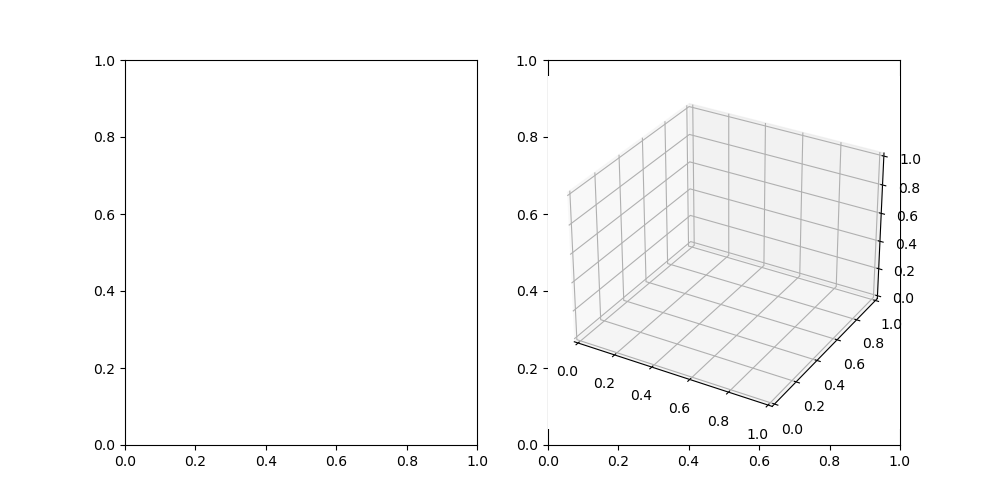

In [57]:
# Visualize
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 1*5))
ax2 = fig.add_subplot(122, projection="3d")
    
def plot_state(frame):
    ax1.clear()
    ax2.clear()
    a, b, loss = history[frame]
    X_val = np.array([7_000, 55_000])
    y_val_hat = predict(X_val,a,b)
    scatter = ax1.scatter(x=X, y=y, s=5)
    line, = ax1.plot(X_val, y_val_hat, color="red")
    ax1.set_xlim((0, 60_000))
    ax1.set_ylim((0, 10))
    ax1.set_xlabel("Gross Domestic Product")
    ax1.set_ylabel("Life satisfaction")
    ax1.set_title(f"Loss: {round(loss, 4)}")
    ax2.plot_surface(A, B, L, cmap='coolwarm', alpha=.5)
    scatter_3d = ax2.scatter(a, b, loss, s=50, c='r', marker='o')
    ax2.set_xlabel('a')
    ax2.set_ylabel('b')
    ax2.set_zlabel('Loss')
    ax2.set_title('3D Plot')
    ax2.set_box_aspect([1, 1, 0.5])
    return scatter, line, scatter_3d

# create the animation object
ani = animation.FuncAnimation(fig, plot_state, frames=len(history), interval=5, blit=True, repeat=False)

# Show the plot
plt.show()

While the above approach works well in low dimensional spaces, the search space grows exponentially with the number of dimensions. We would require a lot of time to find the optimal solution in N-dimensional spaces.

Let's demonstrate this issue by...

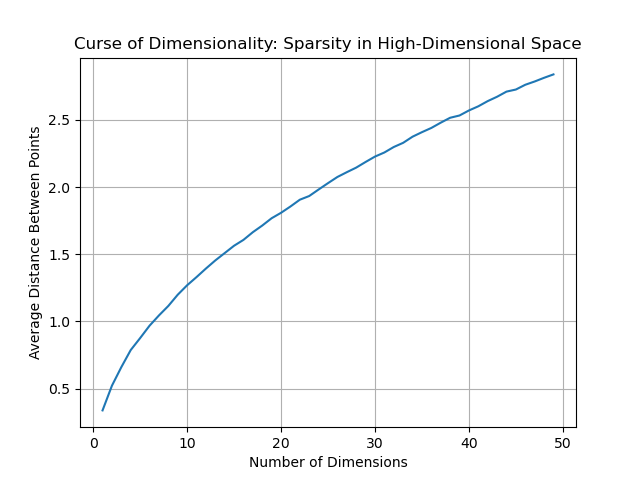

In [58]:
# Utility functions
def generate_random_points(n_points, n_dims): return np.random.rand(n_points, n_dims)
def euclidean_distance(a, b): return np.sqrt(np.sum((a - b)**2, axis=1))
def average_distance(n_points, n_dims):
    points = generate_random_points(n_points, n_dims)
    avg_distances = []
    for i in range(n_points):
        other_points = np.delete(points, i, axis=0)
        distances = euclidean_distance(points[i], other_points)
        avg_distances.append(np.mean(distances))
    return np.mean(avg_distances)

# Number of points to sample and number of dimensions to test
n_points = 1000
dimensions = range(1, 50)

# Calculate the average distance between any two points in the space
avg_distances = [average_distance(n_points, n_dims) for n_dims in dimensions]

# Visualize the relationship between the number of dimensions & the average distance between weight-points
fig, ax = plt.subplots()
ax.plot(dimensions, avg_distances)
ax.set_xlabel('Number of Dimensions')
ax.set_ylabel('Average Distance Between Points')
ax.set_title('Curse of Dimensionality: Sparsity in High-Dimensional Space')
ax.grid()
plt.show()

The second problem that we want to highlight is the time needed to converge compared to using **guided-learning**.

Let's study gradient-based optimization algorithms to get a feeling of how they work. Notes:

- The gradient of a function characterizes how `y` changes if we change `x` a little bit.
- If you move the parameter in the direction of the gradient, `y` will increase locally.
- We want to minimize `Loss=y`, thus, we will move in the **opposite direction** of the given derivative.
- In a way, the gradient is taking on the previous responsibility of samplign a bunch of points to know which direction should we move. 

More formally:
1. Initialize the parameters $\theta$ to random values.
2. Calculate the cost function $J(\theta)$ using the current values of $\theta$.
3. Calculate the partial derivative of the cost function with respect to each parameter $\theta_{j}$.
4. Update each parameter using the update rule $\theta_{j} := \theta_{j} - \alpha\frac{\partial}{\partial \theta_{j}} J(\theta)$.
5. Repeat steps 2-4 until convergence (i.e., until the cost function stops decreasing).

Given a cost function $J(\theta)$ and a learning rate $\alpha$, we want to find the values of the parameters $\theta$ that minimize the cost function. We can use gradient descent to iteratively update the parameters until we converge to the minimum.

The update rule for gradient descent is:

$$\theta_{j} := \theta_{j} - \alpha\frac{\partial}{\partial \theta_{j}} J(\theta)$$

where $\theta_{j}$ is the $j$-th parameter, $\frac{\partial}{\partial \theta_{j}} J(\theta)$ is the partial derivative of the cost function with respect to $\theta_{j}$, and $\alpha$ is the learning rate.

We repeat this update rule for all parameters until convergence:

$$\theta_{0} := \theta_{0} - \alpha\frac{\partial}{\partial \theta_{0}} J(\theta)$$

$$\theta_{1} := \theta_{1} - \alpha\frac{\partial}{\partial \theta_{1}} J(\theta)$$

$$\vdots$$

$$\theta_{n} := \theta_{n} - \alpha\frac{\partial}{\partial \theta_{n}} J(\theta)$$

where $n$ is the number of parameters.

Now, we can pre-calculate the derivatives of the loss function w.r.t. `a` and `b`:

The least squares loss function for a linear regression model f(x) = ax + b is given by:

$$ J(a,b) = \frac{1}{2n}\sum_{i=1}^{n}(f(x_{i}) - y_{i})^2 $$

where $n$ is the number of data points, $x_i$ and $y_i$ are the $i$-th input and target output, and $f(x_i) = ax_i + b$.

To calculate the partial derivative of the loss function with respect to the slope a, we can use the chain rule:

$$ \frac{\partial J}{\partial a} = \frac{1}{n}\sum_{i=1}^{n}(f(x_{i}) - y_{i})\frac{\partial f(x_{i})}{\partial a} $$

$$ = \frac{1}{n}\sum_{i=1}^{n}(f(x_{i}) - y_{i})x_{i} $$

To calculate the partial derivative of the loss function with respect to the intercept b, we can similarly use the chain rule:

$$ \frac{\partial J}{\partial b} = \frac{1}{n}\sum_{i=1}^{n}(f(x_{i}) - y_{i})\frac{\partial f(x_{i})}{\partial b} $$

$$ = \frac{1}{n}\sum_{i=1}^{n}(f(x_{i}) - y_{i}) $$

Therefore, the partial derivatives of the least squares loss function with respect to the slope a and intercept b for a linear regression model f(x) = ax + b are:

$$ \frac{\partial J}{\partial a} = \frac{1}{n}\sum_{i=1}^{n}(f(x_{i}) - y_{i})x_{i} $$

$$ \frac{\partial J}{\partial b} = \frac{1}{n}\sum_{i=1}^{n}(f(x_{i}) - y_{i}) $$

These partial derivatives are used in the gradient descent algorithm to update the values of a and b iteratively to minimize the loss function.

Let's implement the algorithm:

- Learning rate determination is difficult with data that has multiple ranges, for this reason we are going to:
    - Standardize `X`.
    - Standardize `y`.

In [59]:
# Start somewhere
a, b = 0.9, 7.3
lr = .1
prev_loss = float("+inf")
ins, outs = get_data(normalize=True)
alpha = 1e-4
history = list()
n_points = ins.shape[0]

# Search until you can't improve anymore
while True:
    
    # Calculate the new loss
    y_hat_ = predict(ins, a, b)
    new_loss = loss(outs, y_hat_)
    
    # Update the parameters
    a = a - lr*(1/n_points)*(np.sum((y_hat_ - outs)*ins))
    b = b - lr*(1/n_points)*(np.sum(y_hat_ - outs))
    
    # Save to history
    history.append((a, b, new_loss))
    
    # if we are improving much, we break
    if abs(prev_loss - new_loss) < alpha: break
    
    # Update the previous loss
    prev_loss = new_loss
        
    # Get the weights at the minimum loss
    print(f"The current best parameters: {round(a, 2)},{round(b, 2)} with loss: {round(new_loss, 3)}")

The current best parameters: 0.89,6.57 with loss: 1985.383
The current best parameters: 0.88,5.91 with loss: 1610.684
The current best parameters: 0.87,5.32 with loss: 1307.179
The current best parameters: 0.87,4.79 with loss: 1061.339
The current best parameters: 0.86,4.31 with loss: 862.209
The current best parameters: 0.85,3.88 with loss: 700.914
The current best parameters: 0.85,3.49 with loss: 570.265
The current best parameters: 0.84,3.14 with loss: 464.439
The current best parameters: 0.84,2.83 with loss: 378.72
The current best parameters: 0.84,2.55 with loss: 309.288
The current best parameters: 0.83,2.29 with loss: 253.048
The current best parameters: 0.83,2.06 with loss: 207.493
The current best parameters: 0.83,1.86 with loss: 170.594
The current best parameters: 0.82,1.67 with loss: 140.705
The current best parameters: 0.82,1.5 with loss: 116.496
The current best parameters: 0.82,1.35 with loss: 96.886
The current best parameters: 0.82,1.22 with loss: 81.002
The current be

Let's visualize the optimization process:

In [60]:
# Precompute: Estimate 2D loss
a_values = np.linspace(-3., +3., 100)
b_values = np.linspace(-3., +3., 100)
A, B = np.meshgrid(a_values, b_values)
L = np.zeros_like(A)
for i in range(len(a_values)):
    for j in range(len(b_values)):
        a_ = a_values[i]
        b_ = b_values[j]
        y_hat_ = predict(ins, a_, b_)
        L[j,i] = least_squares_loss(outs, y_hat_)

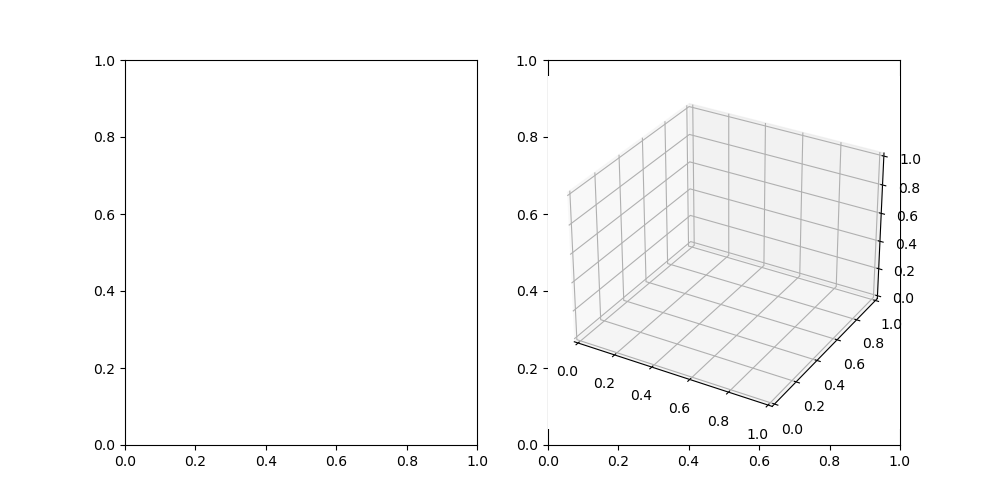

In [61]:
# clear and reset the whole plot
plt.clf()
plt.close()

# Visualize
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 1*5))
ax2 = fig.add_subplot(122, projection="3d")

# Init stuff
X_val = np.array([-2, +2])

def plot_state(frame):
    ax1.clear()
    ax2.clear()
    a, b, loss = history[frame]
    y_val_hat = predict(X_val, a, b)
    scatter = ax1.scatter(x=ins, y=outs, s=5)
    line, = ax1.plot(X_val, y_val_hat, color="red")
    ax1.set_title(f"Loss: {round(loss, 4)}")
    ax1.set_xlim((-3, +3))
    ax1.set_ylim((-3, +3))
    ax1.set_xlabel("Gross Domestic Product")
    ax1.set_ylabel("Life satisfaction")
    ax2.plot_surface(A, B, L, cmap='coolwarm', alpha=.33)
    ax2.set_xlabel('a')
    ax2.set_ylabel('b')
    ax2.set_zlabel('Loss')
    ax2.set_title('3D Plot')
    ax2.set_box_aspect([1, 1, 0.5])
    scatter_3d = ax2.scatter(a, b, loss, s=50, c='r', marker='o')
    return line, scatter_3d, line

# create the animation object
ani = animation.FuncAnimation(fig, plot_state, frames=len(history), interval=100, repeat=False)

# Show the plot
plt.show()

The only difference between the above algorithm and stochastic gradient decsent is in the sample size we use to calculate the gradient:

- Batch gradient descent: we use the whole data set to get an accurate estimate of the gradient at parameter points `(a, b)`.
- Stochastic gradient descent: we use a mini-batch (its size is up to us), to estimate the gradient. Characteristics:
    - `Noisy`: the gradient is less accurate.
    - `Regularization`: introducing noise to the gradient keeps pattern signal and eliminates the signal that typically leads to overfitting.
    - `Efficiency`: we don't have to load all data points into memory to estimate the gradient. We can imagine this being an issue when we have images/videos as data points.

Let's implement stochastic gradient descent with a mini-batch size of `5` points:

In [62]:
# Start somewhere
a, b = 0.9, 7.3
lr = .1
ins, outs = get_data(normalize=True)
history = list()
mini_batch = 10
iterations = 100

# Search until you can't improve anymore
for _ in range(iterations):
    
    # Sample mini-batch data points for the gradient descent step
    ids = sample(range(ins.shape[0]), mini_batch)
    
    # Get the ins & outs
    ins_ = ins[ids]
    outs_ = outs[ids]
    
    # Calculate the new loss
    y_hat_ = predict(ins_, a, b)
    new_loss = loss(outs_, y_hat_)
    
    # Update the parameters
    a -= lr*(1/mini_batch)*(np.sum((y_hat_ - outs_)*ins_))
    b -= lr*(1/mini_batch)*(np.sum(y_hat_ - outs_))
    
    # Save to history
    history.append((a, b, new_loss))
    
    # Get the weights at the minimum loss
    print(f"The current best parameters: {round(a, 2)},{round(b, 2)} with loss: {round(new_loss, 3)}")

The current best parameters: 0.82,6.55 with loss: 559.554
The current best parameters: 0.67,5.89 with loss: 446.315
The current best parameters: 0.74,5.29 with loss: 364.743
The current best parameters: 0.78,4.77 with loss: 276.515
The current best parameters: 0.7,4.29 with loss: 232.373
The current best parameters: 0.77,3.87 with loss: 184.35
The current best parameters: 0.84,3.46 with loss: 168.257
The current best parameters: 0.89,3.13 with loss: 114.852
The current best parameters: 0.93,2.83 with loss: 92.99
The current best parameters: 0.8,2.54 with loss: 86.708
The current best parameters: 0.79,2.27 with loss: 71.787
The current best parameters: 0.79,2.05 with loss: 53.098
The current best parameters: 0.79,1.85 with loss: 42.513
The current best parameters: 0.75,1.69 with loss: 31.391
The current best parameters: 0.68,1.51 with loss: 35.118
The current best parameters: 0.65,1.36 with loss: 25.579
The current best parameters: 0.62,1.23 with loss: 20.888
The current best parameters

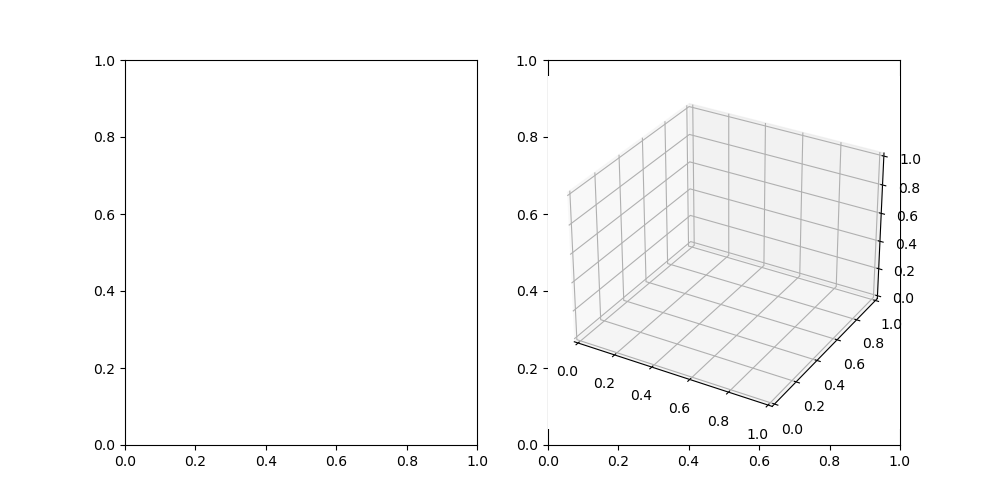

In [63]:
# clear and reset the whole plot
plt.clf()
plt.close()

# Visualize
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 1*5))
ax2 = fig.add_subplot(122, projection="3d")

# Init stuff
X_val = np.array([-2, +2])

def plot_state(frame):
    ax1.clear()
    ax2.clear()
    a, b, loss = history[frame]
    y_val_hat = predict(X_val, a, b)
    scatter = ax1.scatter(x=ins, y=outs, s=5)
    line, = ax1.plot(X_val, y_val_hat, color="red")
    ax1.set_title(f"Loss: {round(loss, 4)}")
    ax1.set_xlim((-3, +3))
    ax1.set_ylim((-3, +3))
    ax1.set_xlabel("Gross Domestic Product")
    ax1.set_ylabel("Life satisfaction")
    ax2.plot_surface(A, B, L, cmap='coolwarm', alpha=.33)
    ax2.set_xlabel('a')
    ax2.set_ylabel('b')
    ax2.set_zlabel('Loss')
    ax2.set_title('3D Plot')
    ax2.set_box_aspect([1, 1, 0.5])
    scatter_3d = ax2.scatter(a, b, loss, s=50, c='r', marker='o')
    return line, scatter_3d, line

# create the animation object
ani = animation.FuncAnimation(fig, plot_state, frames=len(history), interval=100, repeat=False)

# Show the plot
plt.show()

Next, we will implement stochastic gradient decsent with momentum:

<div style="text-align:center;">
    <img style="width:33%;" src="static/imgs/momentum_comparison.png" />
</div>

The update rule for SGD with momentum is:

$$
v_{t} = \beta v_{t-1} + (1 - \beta)\nabla_{\theta}J(\theta_{t-1}) \\
\theta_{t} = \theta_{t-1} - \alpha v_{t}
$$
 
- $t$ is the current iteration
- $\theta_t$ is the parameter vector at iteration $t$
- $v_t$ is the velocity vector at iteration $t$
- $\alpha$ is the learning rate
- $\beta$ is the momentum coefficient
- $\nabla_{\theta} J(\theta_{t-1})$ is the gradient of the loss function $J(\theta)$ with respect to the parameters $\theta$ evaluated at iteration $t-1$.

The momentum update rule consists of two parts
1. $\beta v_{t-1}$ is scaled by the momentum coefficient $\beta$.
2. $(1 - \beta) \nabla_{\theta} J(\theta_{t-1})$ is scaled by $(1 - \beta)$, which reduces the influence of the previous velocity vector and gives more weight to the current gradient estimate. 
3. The velocity vector $v_t$ is updated by summing the previous velocity vector and the current gradient estimate.

Let's implement SGD with momentum:

In [64]:
# Start somewhere
a, b = 0.9, 7.3
lr = .5
beta = .9
ins, outs = get_data(normalize=True)
history = list()
mini_batch = 10
iterations = 100
avs = list()
bvs = list()

# Search until you can't improve anymore
for _ in range(iterations):
    
    # Sample mini-batch data points for the gradient descent step
    ids = sample(range(ins.shape[0]), mini_batch)
    
    # Get the ins & outs
    ins_ = ins[ids]
    outs_ = outs[ids]
    
    # Calculate the new loss
    y_hat_ = predict(ins_, a, b)
    new_loss = loss(outs_, y_hat_)
    
    # Calculate the derivatives
    da = (1/mini_batch)*(np.sum((y_hat_ - outs_)*ins_))
    db = lr*(1/mini_batch)*(np.sum(y_hat_ - outs_))
    
    # create the `v` terms only if the `vs` list is not empty
    if avs and bvs:
        av = beta*avs[-1] + (1 - beta)*da
        bv = beta*bvs[-1] + (1 - beta)*db
    else:
        av, bv = da, db
    
    # Save the terms before updating
    avs.append(av)
    bvs.append(bv)
    
    # Update the parameters
    a -= lr*av
    b -= lr*bv
    
    # Save to history
    history.append((a, b, new_loss))
    
    # Get the weights at the minimum loss
    print(f"The current best parameters: {round(a, 2)},{round(b, 2)} with loss: {round(new_loss, 3)}")

The current best parameters: 0.1,5.47 with loss: 539.193
The current best parameters: -0.6,3.69 with loss: 308.981
The current best parameters: -1.07,1.97 with loss: 213.526
The current best parameters: -1.42,0.38 with loss: 67.845
The current best parameters: -1.62,-1.06 with loss: 59.983
The current best parameters: -1.67,-2.33 with loss: 82.149
The current best parameters: -1.56,-3.41 with loss: 140.758
The current best parameters: -1.3,-4.3 with loss: 165.022
The current best parameters: -0.94,-4.99 with loss: 255.664
The current best parameters: -0.46,-5.48 with loss: 340.871
The current best parameters: 0.09,-5.76 with loss: 366.933
The current best parameters: 0.48,-5.89 with loss: 294.635
The current best parameters: 0.72,-5.85 with loss: 350.625
The current best parameters: 0.98,-5.68 with loss: 321.553
The current best parameters: 1.17,-5.38 with loss: 332.747
The current best parameters: 1.32,-4.98 with loss: 308.17
The current best parameters: 1.37,-4.49 with loss: 243.491


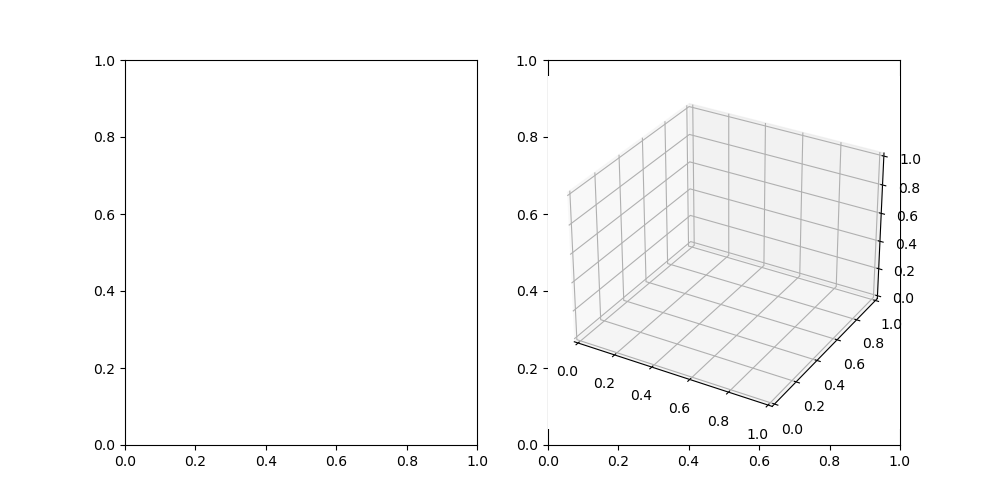

In [65]:
# clear and reset the whole plot
plt.clf()
plt.close()

# Visualize
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 1*5))
ax2 = fig.add_subplot(122, projection="3d")

# Init stuff
X_val = np.array([-2, +2])

def plot_state(frame):
    ax1.clear()
    ax2.clear()
    a, b, loss = history[frame]
    y_val_hat = predict(X_val, a, b)
    scatter = ax1.scatter(x=ins, y=outs, s=5)
    line, = ax1.plot(X_val, y_val_hat, color="red")
    ax1.set_title(f"Loss: {round(loss, 4)}")
    ax1.set_xlim((-3, +3))
    ax1.set_ylim((-3, +3))
    ax1.set_xlabel("Gross Domestic Product")
    ax1.set_ylabel("Life satisfaction")
    ax2.plot_surface(A, B, L, cmap='coolwarm', alpha=.33)
    ax2.set_xlabel('a')
    ax2.set_ylabel('b')
    ax2.set_zlabel('Loss')
    ax2.set_title('3D Plot')
    ax2.set_box_aspect([1, 1, 0.5])
    scatter_3d = ax2.scatter(a, b, loss, s=50, c='r', marker='o')
    return line, scatter_3d, line

# create the animation object
ani = animation.FuncAnimation(fig, plot_state, frames=len(history), interval=100, repeat=False)

# Show the plot
plt.show()

Next, let's implement `AdaGrad`, but first we explain it:
- The motivation behind the `AdaGrad` optimization algorithm is to **adapt the learning rate of each parameter** during training based on the historical gradient information. 
- The key idea is that if a parameter has been updated frequently in the past, its learning rate should be decreased to avoid overshooting the minimum of the loss function. 
- Conversely, if a parameter has been updated infrequently, its learning rate should be increased to allow for larger updates.

It has the following main formulation:

$$\theta_{t+1,i} = \theta_{t,i} - \frac{\alpha}{\sqrt{G_{t,ii} + \epsilon}} g_{t,i}$$

Let's implement it:

In [54]:
# Start somewhere
a, b = 0.9, 7.3
lr, eps = .01, 1e-8
ins, outs = get_data(normalize=True)
history = list()
mini_batch = 10
iterations = 100
das = list()
dbs = list()

# Search until you can't improve anymore
for _ in range(iterations):
    
    # Sample mini-batch data points for the gradient descent step
    ids = sample(range(ins.shape[0]), mini_batch)
    
    # Get the ins & outs
    ins_ = ins[ids]
    outs_ = outs[ids]
    
    # Calculate the new loss
    y_hat_ = predict(ins_, a, b)
    new_loss = loss(outs_, y_hat_)
    
    # Calculate the derivatives
    da = (1 / mini_batch) * (np.sum((y_hat_ - outs_) * ins_))
    db = (1 / mini_batch) * (np.sum(y_hat_ - outs_))

    # If we have histories of gradients, we update the learning rate
    if das and dbs:
        lr_a = lr / sqrt(sum(das) + eps)
        lr_b = lr / sqrt(sum(dbs) + eps)
    else:
        lr_a, lr_b = lr, lr
        
    # We save the latest gradients
    das.append(da)
    dbs.append(db)
    
    # Perform the gradient descent step
    a -= lr_a * da
    b -= lr_b * db
        
    # Save to history
    history.append((a, b, new_loss))
    
    # Get the weights at the minimum loss
    print(f"The current best parameters: {round(a, 2)},{round(b, 2)} with loss: {round(new_loss, 3)}")

The current best parameters: 0.93,7.23 with loss: 527.692


ValueError: math domain error

> /var/folders/yy/rf24s6hn0w58lbzp_7xlf0pc0000gn/T/ipykernel_11203/3249276441.py(31)<module>()
     29     # If we have histories of gradients, we update the learning rate
     30     if das and dbs:
---> 31         lr_a = lr / sqrt(sum(das) + eps)
     32         lr_b = lr / sqrt(sum(dbs) + eps)
     33     else:



ipdb>  das


[-2.7118302470805498]


ipdb>  q


In summary, we go through the following steps to deploy an ML algorithm:
1. We study the data: Exploratory data analysis (EDA)
2. We select the model
3. We train the model
4. We infer using the model

## Main Challenges of Machine Learning

The two things that can go wrong with a machine learning project are:
- Collecting bad data.
- Picking a bad learning algorithm

### Data

Data quantity can be a big problem. Even for very simple ml algorihtms, it takes thousands of examples for a convolutional neural network to recognize Cat/Dog in images. A famous paper showed that many algorithms, ranging from very simple ones to complex, perform relatively the same when given enough data. The authors argued that companies should reconsider where to invest their money, in algorithms development or in data corpus engineering.

The training sample can also be non-representative of the source dataset. In order to generalize well, It's important that our training data be representative of the data that we want to use in production. If, for example, the training set is too small, we will have sampling noise. Even large samples can be non-representative if the sampling method is flawed, this is called **sampling bias** (Example: non-response bias).

Poor quality data can also be a big challenge. Obviously, if our training data is full of outliers, errors, and noise, it will make it harder for the algorithm to detect the underlying patterns, resulting in a bad model. It's always better to properly clean and investigate the data before doing any modeling. Examples of data cleaning:
- Outlier detection and cleaning by either removing or replacing the outlier values.
- Cleaning missing features by either discarding their instances, filling them with median/average, or training an auxiliary model to predict their values. 

It's almost always the case that datasets contain irrelevant features. Our system will only learn if the data contains many relevant features and not so many irrelevant ones. A critical part of the success of a machine learning project is what's called **feature engineering** or coming up with features that would produce a quality model, it contains two steps:
1. Feature selection: selecting the most useful features to analyze.
2. Feature Extraction: adding new features based of the selected ones.
We can also create new features by gathering new data.

### Overfitting

Overfitting means that the ML system performs well on the training data but fails to generalize. Complex models such as deep neural networks tend to memorize training data noise or even the data sample itself if it is small enough. We can do the following to mitigate overfitting:
- Select a model with fewer weights/parameters to constrain its predictive power so that it can use only the strongest present patterns.
- Gather more training data.
- Reduce the noise in the training data by fixing errors and eliminate outliers.

Constraining a model & fighting overfitting is called **regularization**. If we take the example of a single linear regression model ($f(x)=ax+b$), it has two degrees of freedom ($2$ parameters). If we let the algorithm change one parameter's values freely but have a set interval around parameter 2, it will have between 1 and 2 degree of freedom. We would want a good balance between keeping the model as simple as possible while giving the model the ability to capture out of training data patterns.

Regularization can be controlled using the model's hyperparameters, which describe how the model should learn.

### Underfitting

Underfitting is the opposite of overfitting. It occurs when the model is too simple to capture the underlying structure of the training data. We present the following solutions to the problem:
- We can select a more powerful model, with more parameters
- We feed better features to the learning algorithm (feature engineering)
- We reduce the constraints on the model (reduce regularization)

## Testing & Validating

We can evaluate our model by splitting the data into two sets: **training** and **testing** data sets. We only care about out-of-training error, or generalization error, as it is representative of the model's performance in a production environment.

If our training error is low but the testing error is high, this means that the model is overfitting. It's common to use **80%** of the data for training and the remaining 20% for testing, but it is dependent on the size of the original data set, the bigger it is, the less percent we can take as a testing set.

If we fine-tune regularization parameters on the test set, we are sort of overfitting to it, so we need another data set for hyper-parameter tuning, this data set is usually called the **validation set**. The validation set should be set aside from the training set. After conducting hyper-parameter tuning on using the validation set, we train the model on the full training set (with validation) & evaluate on the test set.

A simple but computationally expensive solution to setting aside a large validation set is to perform repeated cross-validation. Its drawback is that we have to train the model N-repetitions. The validation set & the test set must be as representative as possible of the data we will use in production. 

One Problem is that if the algorithm is performing poorly on the validation set, we won't know if the cause is overfitting or if the training set isn't good for the task at hand. A solution to this is to introduce another validation set, called 'train-dev' set. After training, we will validate the model on both `train-dev` & validation sets. If evaluation is good on `train-dev` & bad on `validation`, this means that the data is not good for the task at hand. If evaluation is bad on `train-dev` & bad on `validation`, this means overfitting or the algorithm/overall data is not good.


We should think of a model as a simplified version of the observations. This simplification is meant to discard noise and capture generalizable useful patterns in the training and testing datasets. To decide what information to discard and what to keep, you must make assumptions. For example, a linear model assumes that the relation between the input & output is fundamentally linear & the distance between the model line and the observations is essentially **noise**.

If we make no assumptions about the data, than there is no need to prefer one model over another. This is the point behind the "no free lunch theorem", which states the following:

> [David Wolpert & William Macready] Any two optimization algorithms are equivalent when their performance is averaged across all possible problems

## Exercices

**1. How would you define Machine Learning?**

Machine Learning is the computer's ability to learn from data without being explicitly programmed.

**2. Can you name four types of problems where it shines?**

Image classification, Voice Recognition, Semantic Segmentation, Sentiment Analysis.

**3. What is a labeled training set?**

In the context of supervised learning, a labeled training set is a data set with available targets. Meaning that what you want to predict is known before training.

Example: a training set composed of images of cats or dogs and the corresponding **label** (cat/dog) for each of the images.

**4. What are the two most common supervised tasks?**

Classification (where the target is categorical in nature) & Regression (where the labels' domain is continuous).

**5. Can you name four common unsupervised tasks?**

Clustering, Anomaly detection, Visualization, dimensionality reduction.

**6. What type of machine learning algorithm would you use to allow a robot to walk in many paths in an unknown terrain?**

Reinforcement learning.

**7. What type of algorithm would you use to segment your customers into multiple groups?**

An unsupervised clustering algorithm like `K-means` or `DBSCAN`.

**8. Would you frame the problem of spam detection as a supervised learning or an unsupervised learning problem?**

It a supervised learning problem.

**9. What is an online learning system?**

An online learning system continues to learn from new data after being deployed in production, in contrast to a batch learning model which would stop learning after the initial training process.

**10. What is out-of-core learning?**

We use out-of-core learning algorithms when the training data can't fit in a computer's RAM.

**11. What type of learning algorithm relies on a similarity measure to make predictions?**

Instance-based models, an example of this is K-nearest neighbors.

**12. What is the difference between a model's parameters and a learning algorithm's hyper-parameter?**

Model parameters are the knobs that, collectively, store the learned knowledge of the model, also called weights, they are continuously changed during training to minimize a cost function. Examples are `a` & `b` in the linear model: $f(x) = ax + b$.

A learning algorithm's hyper-parameter describes how the algorithm should learn and control the predictive power of the model, example is the learning rate, number of layers in a NN, number of parameters, batch size, they are set before training and aren't changed during training.

**13. What do model-based algorithms search for?**

A decision boundary.

**14. What is the most common strategy they use to succeed?**

They minimize a cost function that describe the distance between the predictions outputted by the model and the real target values.

**14. How do they make predictions?**

They start with a set of initial parameters, make predictions based on the input & their parameters, then adjust their parameters to minimize cost.

**15. Can you name 4 of the main challenges in machine learning?**

For algorithmic challenges: Model Overfitting, Model Underfitting. Data challenges include: Data mismatch, Noisy data.

**16. If your model performs great on the training data but fails on the test data, What is happening?**

Overfitting, the model starts memorizing noise present on the training data to further minimize the cost function. 

**17. Can you name 3 possible solutions?**

Regularization, Adding more data, Simplifying the model.

**18. What is a test set? & Why you would want to use it?**

The whole data set is usually split into training and testing data sets, we use test data to evaluate the generalizability of the model beyond the training data set.

**19. What is the purpose of a validation set?**

A validation set is used to fine-tune the models' hyper-parameters, what is called manual training. It leaves the test set for the final evaluation.

**20. What is the `train-dev` set?, When do you use it? & How do you use it?**

the `train-dev` is a validation set that is taken from a broad training set after performing the train/validation/test split. We use it when we have a broad training data set (ex. images of all animals) but specific validation/test set (zoo animal pics taken with mobile phones) and we want to correctly interpret the model's evaluation. 

We train the model on the training data set, we evaluate on `train-dev` and `validation`, if model performs badly on both, we have an overfitting case, if the model performs good in `train-dev` and badly on `validation` we have a data mismatch, we conclude that the learning doesn't generalize to our specific production data.

**21. What can go wrong if you tune hyper-parameters using the test set?**

We can accidentaly overfit to the test set by manually finding hyper-parameters that perform well on the test set but doesn't generalize to production data.

---